In [1]:
#run: pip install openquantumcomputing
from openquantumcomputing.QAOAMaxCut import QAOAMaxCut

In [2]:
from qiskit import *
import numpy as np
import networkx as nx

import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

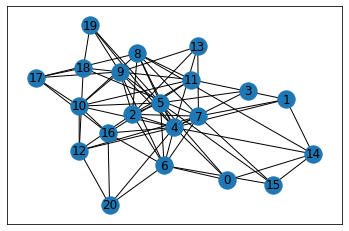

In [3]:
numV=21
G = nx.read_gml("../../data/sample_graphs/w_ba_n"+str(numV)+"_k4_0.gml")
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos=pos)

In [4]:
params={'G': G}
qaoamc = QAOAMaxCut()

In [5]:
qasm_sim = Aer.get_backend('qasm_simulator')

In [6]:
qaoamc.sample_cost_landscape(qasm_sim, 1024, params=params, angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi,20]})

Calculating Energy landscape for depth p=1...
Calculating Energy landscape done


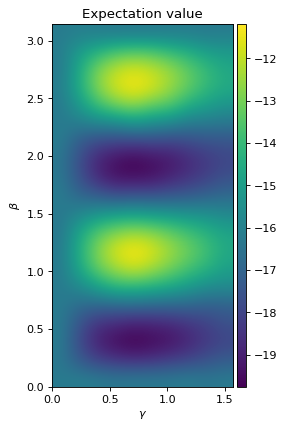

In [7]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoamc.E,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

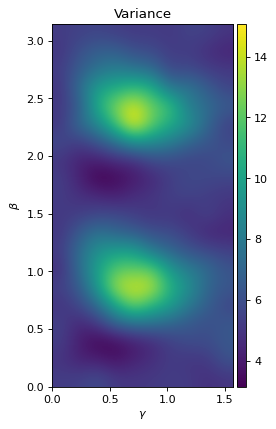

In [8]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Variance')
im = ax.imshow(qaoamc.Var,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

In [9]:
maxdepth=10
for i in range(maxdepth):
    qaoamc.increase_depth(qasm_sim, params=params, precision=0.025)

rep= 0 : -19.75170221303221
rep= 0 : -21.287216115771162
rep= 0 : -22.111488285659696
rep= 0 : -22.716067811980782
rep= 0 : -23.014154731167896
rep= 0 : -23.298124946509
rep= 0 : -23.481371339281417
rep= 0 : -23.623722021240948
rep= 0 : -23.675534625484914
rep= 0 : -23.76297412014306


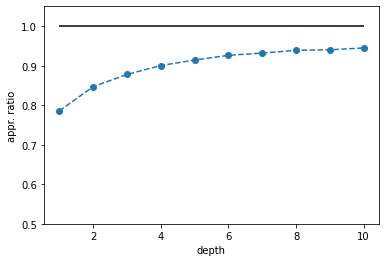

In [10]:
mincost=-25.23404480588015
pl.plot(np.arange(1,maxdepth+1), np.array(list(qaoamc.costval.values()))/mincost,'o--')
pl.hlines(1, 1,maxdepth, linestyles="solid", colors="black")
pl.ylim(0.5,1.05)
_=pl.ylabel('appr. ratio')
_=pl.xlabel('depth')

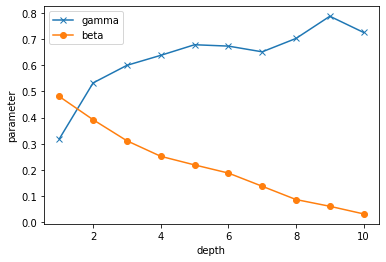

In [11]:
pl.plot(np.arange(1,maxdepth+1),qaoamc.angles_hist['d'+str(maxdepth)+'_final'][::2],"x-",label='gamma')
pl.plot(np.arange(1,maxdepth+1),qaoamc.angles_hist['d'+str(maxdepth)+'_final'][1::2],"o-",label='beta')
_=pl.ylabel('parameter')
_=pl.xlabel('depth')
_=pl.legend()

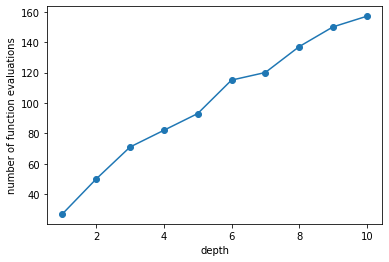

In [12]:
_=pl.plot(np.arange(1,maxdepth+1),qaoamc.num_fval.values(),"o-")
_=pl.ylabel('number of function evaluations')
_=pl.xlabel('depth')

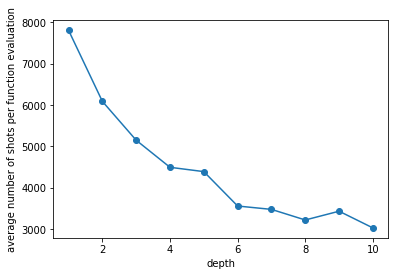

In [13]:
_=pl.plot(np.arange(1,maxdepth+1),np.array(list(qaoamc.num_shots.values()))/np.array(list(qaoamc.num_fval.values())),"o-")
_=pl.ylabel('average number of shots per function evaluation')
_=pl.xlabel('depth')